In [12]:
import pandas as pd
import hbac_kmeans
import os
from pathlib import Path
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

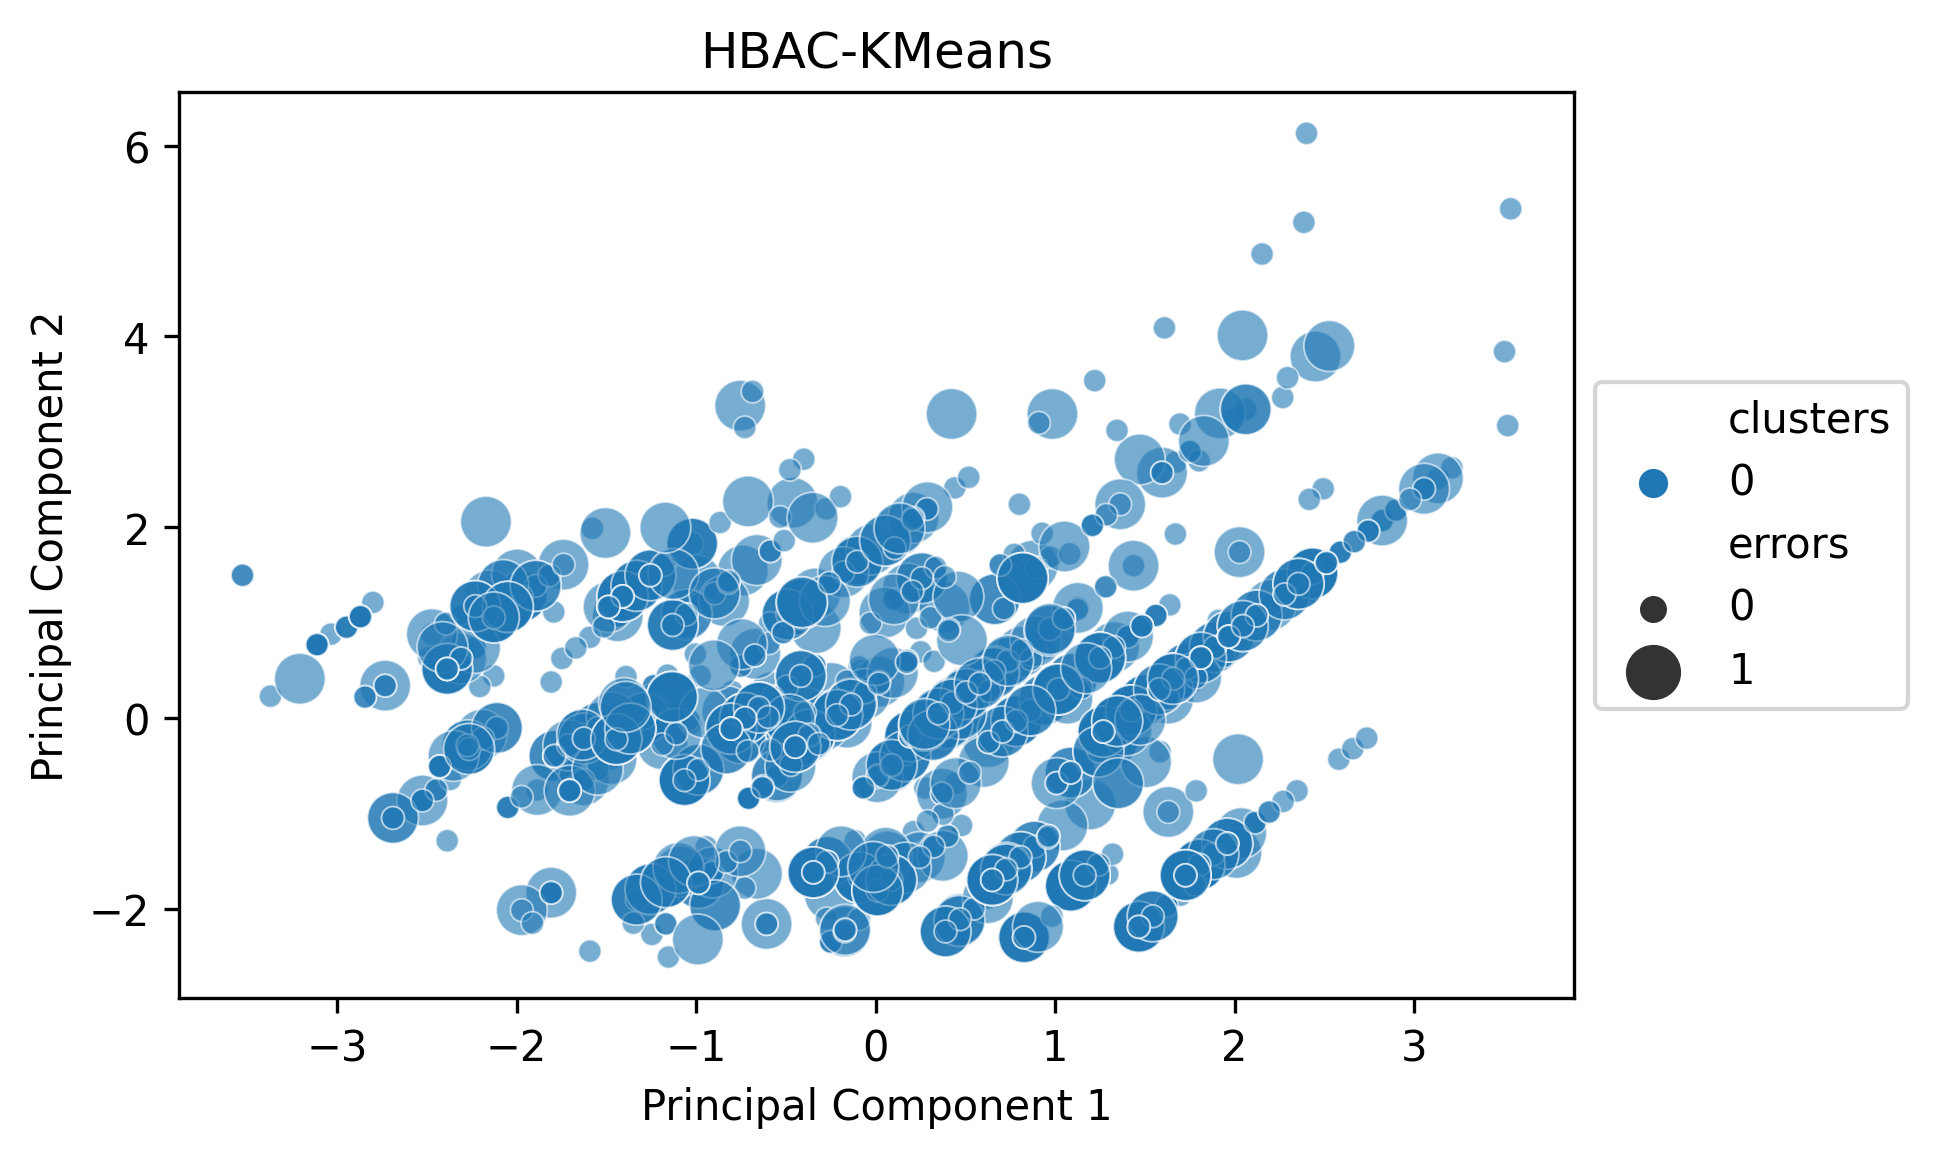

average_accuracy is:  0.6727861771058316
[1 0]
discriminating bias is: -0.0158561612852538
adding a new cluster


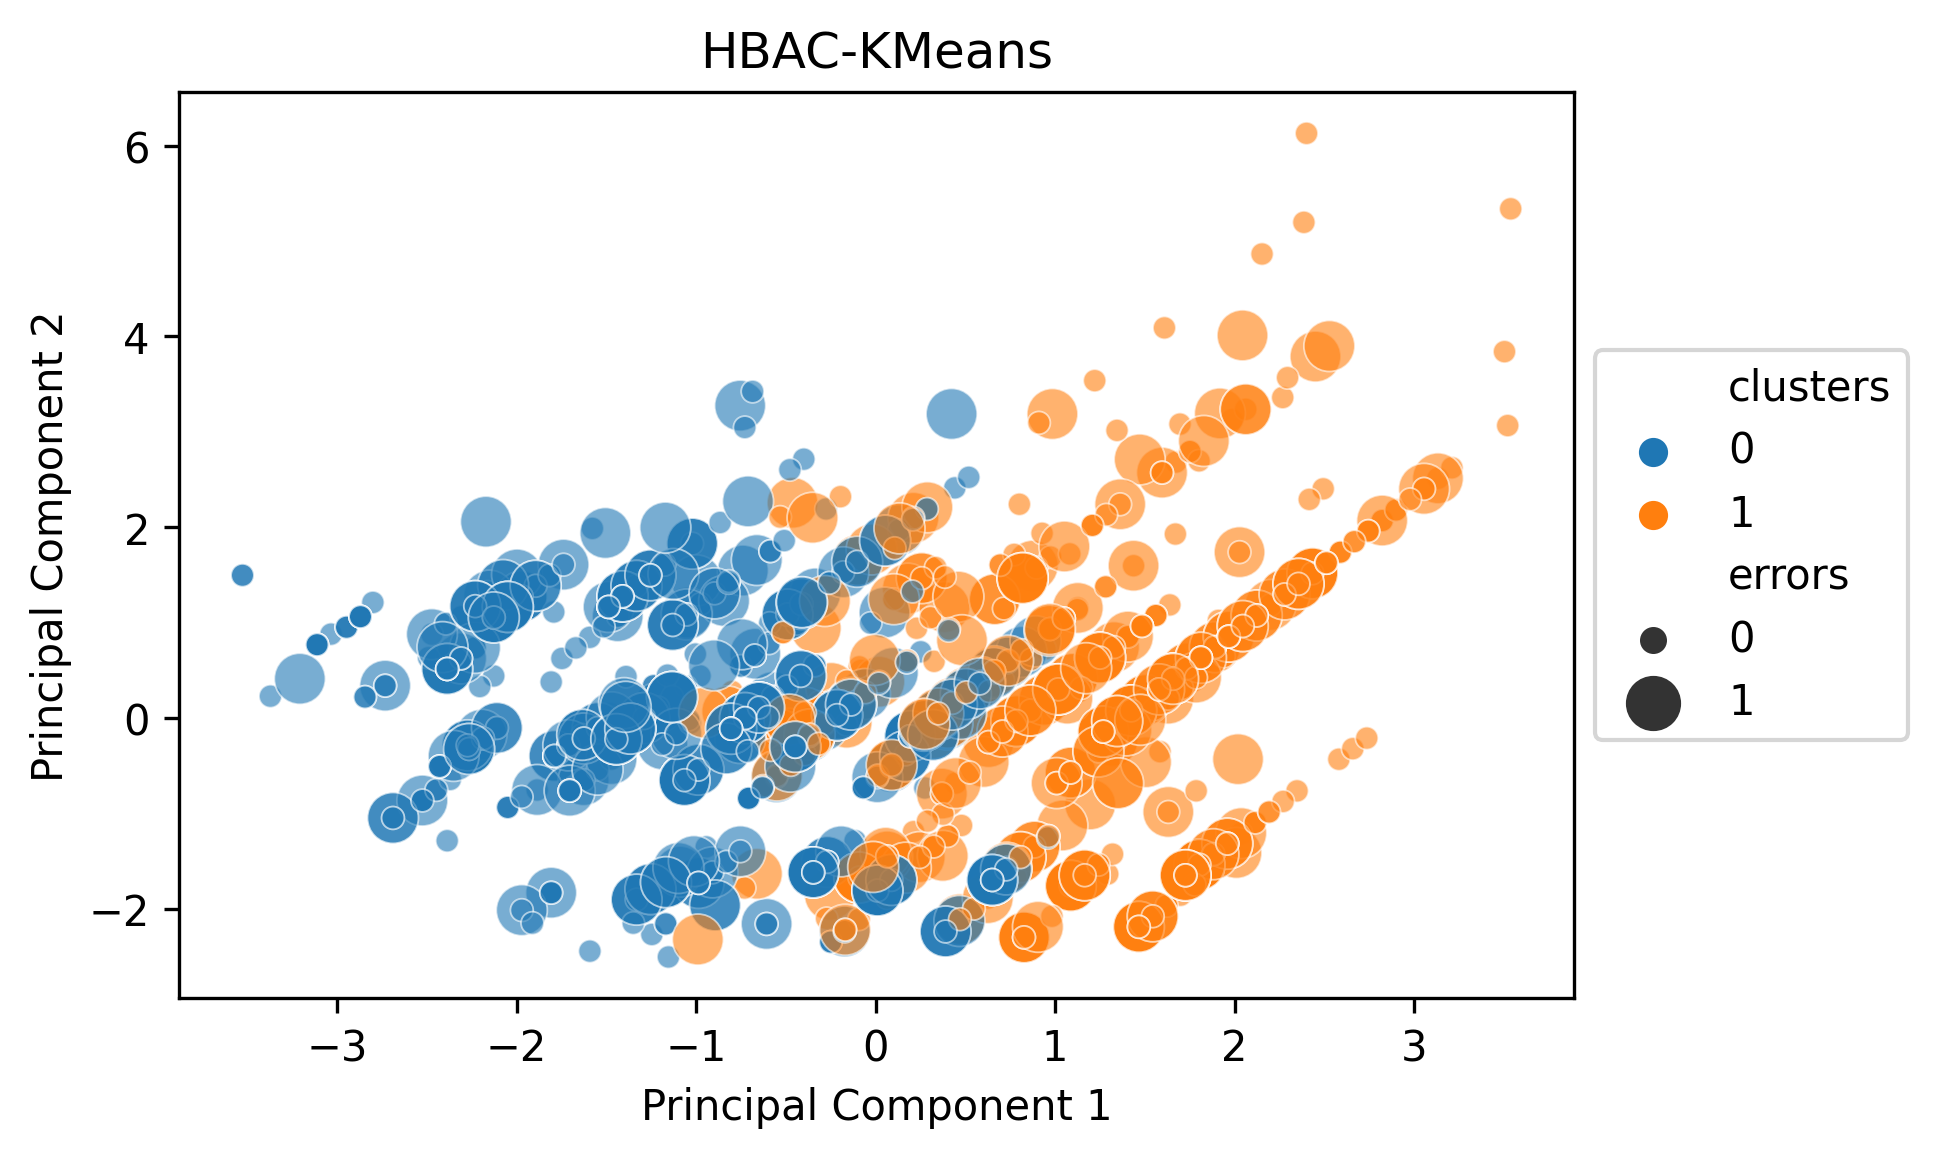

--> Cluster with the highest variance: 1
[ 0. -1.  1.]
discriminating bias is: -0.015830782447682434
This is the random cluster we have picked: 2
This is the random cluster we have picked: 0
[-1.  0.  1.]
discriminating bias is: -0.0021496486151302285
This is the random cluster we have picked: 2
This is the random cluster we have picked: 0
[-1.  1.  0.]
discriminating bias is: 0.010060562878517976
This is the random cluster we have picked: 1
[ 0. -1.  1.]
discriminating bias is: -0.015830782447682434
This is the random cluster we have picked: 2
This is the random cluster we have picked: 0
[-1.  1.  0.]
discriminating bias is: 0.010060562878517976
This is the random cluster we have picked: 2
This is the random cluster we have picked: 1
[ 1. -1.  0.]
discriminating bias is: -0.015830782447682434
This is the random cluster we have picked: 0
[-1.  0.  1.]
discriminating bias is: -0.0021496486151302285
This is the random cluster we have picked: 2
This is the random cluster we have picked: 1

In [5]:
DATASET_NAME = "final_preprocessed_compas"

# load data
# path = Path(os.getcwd()).absolute()
# raw_data = pd.read_csv(str(path) + fr'\Preprocessed_datasets\{DATASET_NAME}.csv', index_col=0)
raw_data = pd.read_csv(r'..\Preprocessed_datasets\final_preprocessed_compas.csv', index_col=0)
# raw_data = pd.read_csv(r'..\Preprocessed_datasets\preprocessed_german_credit.csv', index_col=0)
results = hbac_kmeans.hbac_kmeans(raw_data, show_plot=True)


## Analysing the discriminated cluster

In [6]:
c = hbac_kmeans.get_max_bias_cluster(results)
highest_biased_cluster = results[results['clusters']==c]
len(highest_biased_cluster)

accuracy_full_data = hbac_kmeans.accuracy(results)
most_biased_cluster_kmeans_aware = hbac_kmeans.bias_acc(results, c, 'clusters')
results[results['clusters']==c]

print('General accuracy of classifier on this dataset:', accuracy_full_data)
# print('Number of clusters: ', full_data['clusters'].unique()) 

print(f"cluster {c} has the highest discrimination bias")
print(most_biased_cluster_kmeans_aware)



1 has bias -0.0158561612852538
0 has bias 0.0158561612852538
cluster with the highest discriminating bias: 1
General accuracy of classifier on this dataset: 0.6727861771058316
cluster 1 has the highest discrimination bias
-0.0158561612852538


## Visualisations and Statistical Tests

In [8]:
discriminated_cluster = results[results['clusters']==c]

print('Number of instances in discriminated cluster:', len(discriminated_cluster))
print('Number of errors in discriminated clusters: ', len(discriminated_cluster.loc[discriminated_cluster['errors']==1]))
print('Dataframe of found discriminated cluster:')
display(discriminated_cluster)


Number of instances in discriminated cluster: 794
Number of errors in discriminated clusters:  267
Dataframe of found discriminated cluster:


,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
4590,-0.672808,1.125535,-0.497974,1.899201,0.969158,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,1.331336,0.8,0,1,1,1,-1
2482,0.560285,1.125535,-0.497974,1.899201,-1.031824,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,-0.751125,0.8,1,0,1,1,-1
1109,1.587862,1.125535,-0.497974,-0.526537,-1.031824,-0.065866,3.297240,-0.04028,-0.231235,-0.476763,1.331336,0.8,1,0,1,1,-1
5933,3.437502,1.125535,-0.497974,-0.526537,0.969158,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,-0.751125,0.0,1,1,0,1,-1
4455,0.354769,1.125535,-0.497974,1.899201,-1.031824,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,1.331336,0.0,1,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,-0.672808,1.125535,-0.497974,-0.526537,-1.031824,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,-0.751125,0.8,1,0,1,1,-1
3358,0.560285,1.125535,-0.497974,-0.526537,-1.031824,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,-0.751125,0.8,1,0,1,1,-1
5048,0.765800,1.125535,2.008136,-0.526537,-1.031824,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,-0.751125,0.8,1,0,1,1,-1
2448,-0.467293,1.125535,-0.497974,-0.526537,-1.031824,-0.065866,-0.303284,-0.04028,-0.231235,-0.476763,-0.751125,0.0,0,0,0,1,-1


## Statistical Test (Welch) 
This test is used to investigate whether the average feature values of the discriminated cluster are significantly different from those of the remaining clusters.

In [9]:
# unscaling the clusters
unscaled_discriminated = raw_data.loc[discriminated_cluster.index, :]
# unscaled other data
unscaled_remaining = raw_data.drop(discriminated_cluster.index)

# Welch's test 
for i in unscaled_remaining:
    welch_i = stats.ttest_ind(unscaled_discriminated[i], unscaled_remaining[i], equal_var=False)
    print(i)
    print('this is the t-statistic', welch_i.statistic)
    print('this is the p-value:', welch_i.pvalue)

Number_of_Priors
this is the t-statistic 17.107276584436367
this is the p-value: 1.1875791696896959e-57
score_factor
this is the t-statistic 185.5399631975069
this is the p-value: 0.0
Age_Above_FourtyFive
this is the t-statistic -11.016607765971663
this is the p-value: 2.307854607760442e-27
Age_Below_TwentyFive
this is the t-statistic 7.677432788935973
this is the p-value: 2.958813508895009e-14
African_American
this is the t-statistic 13.419927591738466
this is the p-value: 3.7205175399426574e-39
Asian
this is the t-statistic -2.8378395538390353
this is the p-value: 0.004628868449835434
Hispanic
this is the t-statistic -4.230957337016665
this is the p-value: 2.440856083833989e-05
Native_American
this is the t-statistic 1.7342391227910188
this is the p-value: 0.08326427117540583
Other
this is the t-statistic -6.711755743848624
this is the p-value: 2.6808003648292753e-11
Female
this is the t-statistic -1.2230304065878799
this is the p-value: 0.22148308112669823
Misdemeanor
this is the t-

## Creating DF with mean difference between features

In [10]:
mean_clusters = pd.DataFrame()
mean_clusters['unscaled_discriminated'] = unscaled_discriminated.mean()
mean_clusters['unscaled_remaining'] = unscaled_remaining.mean()
mean_clusters['difference'] = unscaled_discriminated.mean() - unscaled_remaining.mean()
display(mean_clusters)


,unscaled_discriminated,unscaled_remaining,difference
Number_of_Priors,5.540302,1.572779,3.967523
score_factor,0.996222,0.024575,0.971647
Age_Above_FourtyFive,0.090680,0.279773,-0.189093
Age_Below_TwentyFive,0.303526,0.152174,0.151353
African_American,0.686398,0.387524,0.298874
Asian,0.000000,0.007561,-0.007561
Hispanic,0.054156,0.106805,-0.052649
Native_American,0.003778,0.000000,0.003778
Other,0.015113,0.077505,-0.062391
Female,0.172544,0.194707,-0.022163


,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor,predicted_class,true_class,errors,index
unscaled_discriminated,5.540302,0.996222,0.090680,0.303526,0.686398,0.000000,0.054156,0.003778,0.015113,0.172544,0.244332,0.749370,0.639798,0.336272,unscaled_discriminated
unscaled_remaining,1.572779,0.024575,0.279773,0.152174,0.387524,0.007561,0.106805,0.000000,0.077505,0.194707,0.448015,0.162571,0.316635,0.320416,unscaled_remaining


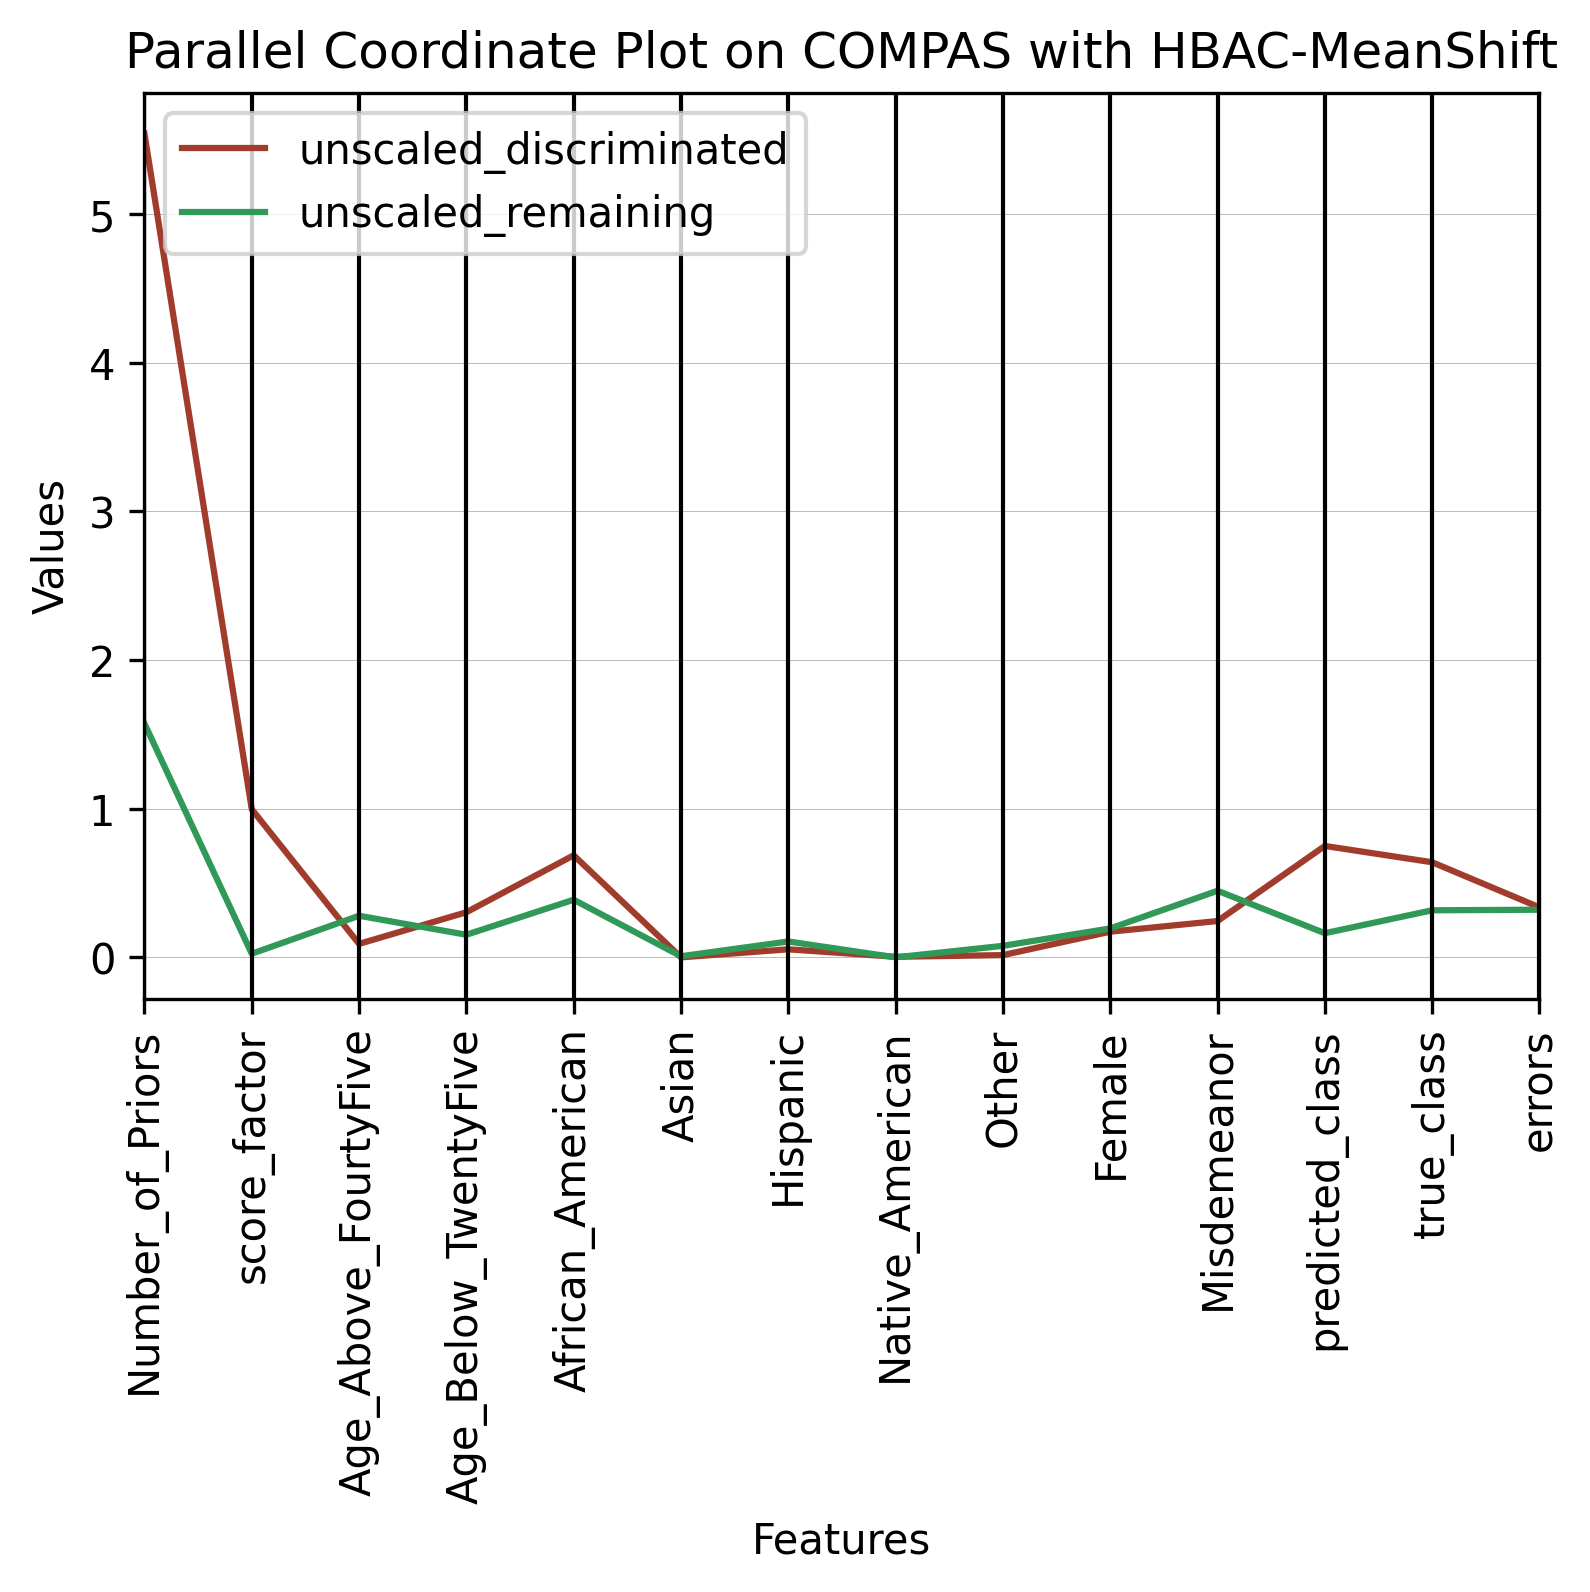

In [13]:
# creating df for parallel coordinate plot
df_parallel = pd.DataFrame()
df_parallel['unscaled_discriminated'] = unscaled_discriminated.mean()
df_parallel['unscaled_remaining'] = unscaled_remaining.mean()
# df_parallel['difference'] = unscaled_discriminated.mean() - unscaled_remaining.mean()
df_parallel_transpose = df_parallel.T
df_parallel_transpose['index'] = df_parallel_transpose.index
display(df_parallel_transpose.head())

# create parallel coordinate plot
def create_parallel_coord_plot(copy_research_transpose, title):
    disc_plot = parallel_coordinates(copy_research_transpose, 'index', color= ('#a13c2d', '#319957'))
    plt.xticks(rotation=90)
    plt.legend(loc="upper left")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.grid(linewidth=0.2)
    plt.title(title)
    plt.show()

create_parallel_coord_plot(df_parallel_transpose, "Parallel Coordinate Plot on COMPAS with HBAC-MeanShift")

## Density distribution plots

In [15]:
df_all = raw_data.copy(deep=True)
df_all["bias"] = "remaining"

NameError: name 'welchtest' is not defined

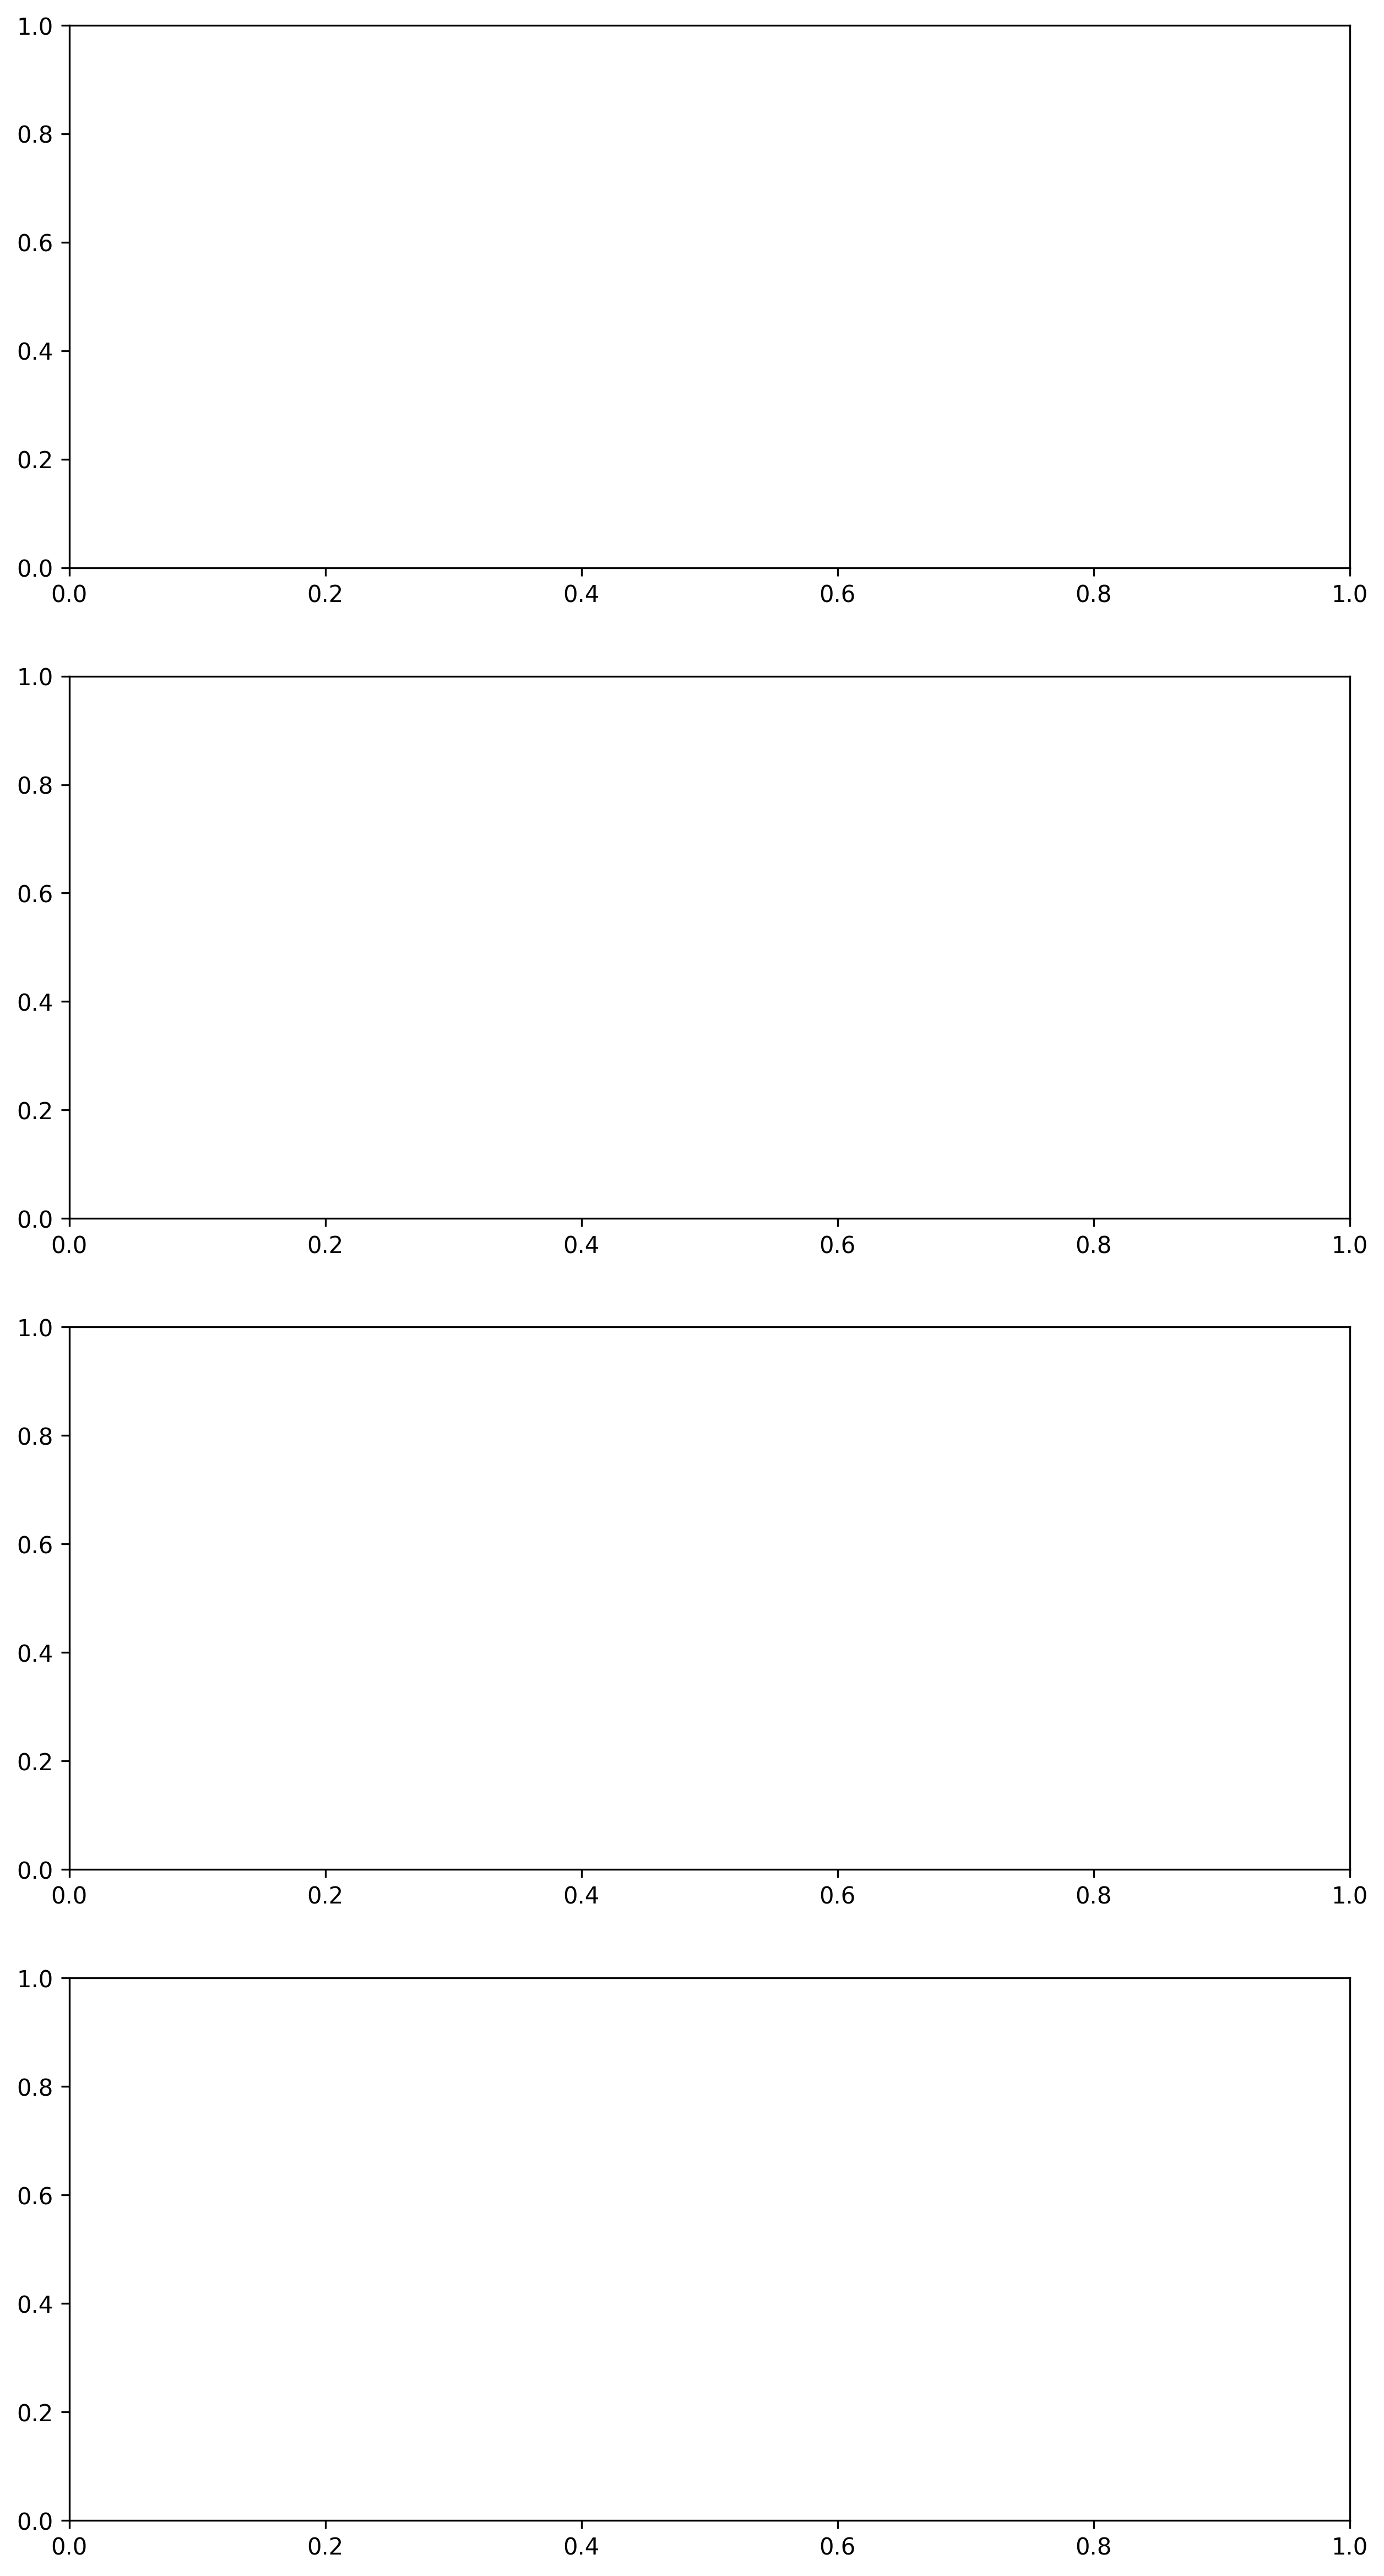

In [16]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,20))
# creating a dictionary with one specific color per group:
my_pal = {"remaining": "g", "discriminated": "r"}

i = 0
for col in welchtest.columns:
    sns.kdeplot(data=welchtest, x=col, shade=True, hue="bias", multiple='layer', ax=ax[i], palette=my_pal, alpha=0.1) # axis tweedimenionaal. Dus doorlopen met mod van i en / 5 naar beneden afgerond.
    ax[i].set_title(col, fontsize=12) # title niet overlappen, Grootte zelf bepalen. Maar 1 legenda 
    i += 1
    print(i) # dit en alles er onder moet uiteindelijk weg
    if i >= 4: 
        break

plt.tight_layout()

plt.show()
